## Домашнее задание 3

**О задании**

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [377]:
import pandas as pd
from IPython.display import Image
from matplotlib.pyplot import figure

**Задание 1**

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [378]:
df = pd.read_csv('german_credit.csv')

In [379]:
df.shape

(1000, 21)

In [381]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


**Задание 2**

Определите, есть ли пропуски в данных.

In [382]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**Задание 3**

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [383]:
df.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

**Задание 4**


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)?

In [384]:
df_subgroup = df.loc[(df['age'] < 30) & (df['housing'] == 'rent')]
df_subgroup.shape[0] * 100 / df.shape[0]

24.6

А какой процент клиентов старше 40 лет снимает жилье?

In [385]:
df_subgroup = df.loc[(df['age'] > 40) & (df['housing'] == 'rent')]
df_subgroup.shape[0] * 100 / df.shape[0]

18.5

**Задание 5**

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [386]:
df_subgroup = df.loc[(df['foreign_worker'] == 'yes') & (df['number_credits'].isin(['4-5', '>= 6']))]
df_subgroup.shape[0]

1

**Задание 6**

In [387]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

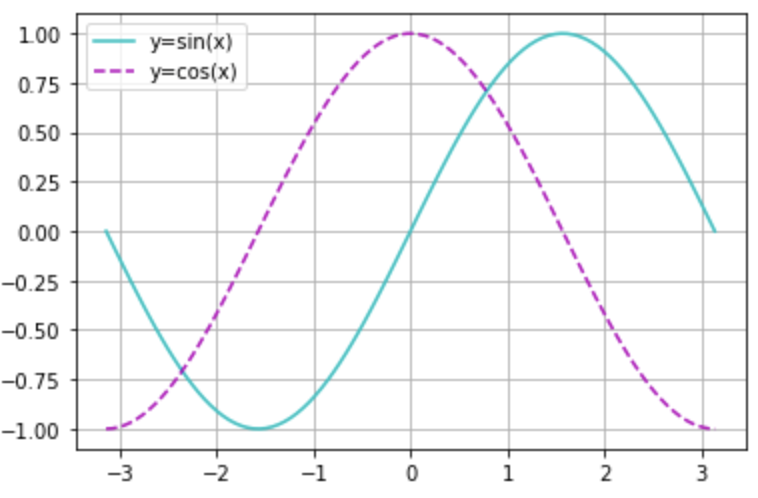

In [388]:
Image("imgs/task_6.png", width=200, height=200)

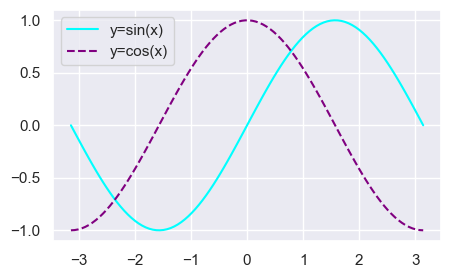

In [391]:
plt.figure(figsize=(5, 3))
x = np.linspace(start=-np.pi, stop=np.pi, num=100)
y_sin = np.sin(x)
y_cos = np.cos(x)
ax_sin = plt.plot(x, y_sin, color='cyan', label='y=sin(x)')
ax_cos = plt.plot(x, y_cos, color='purple', linestyle='dashed', label='y=cos(x)')
plt.legend()
plt.show()

**Задание 7**

In [399]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn.

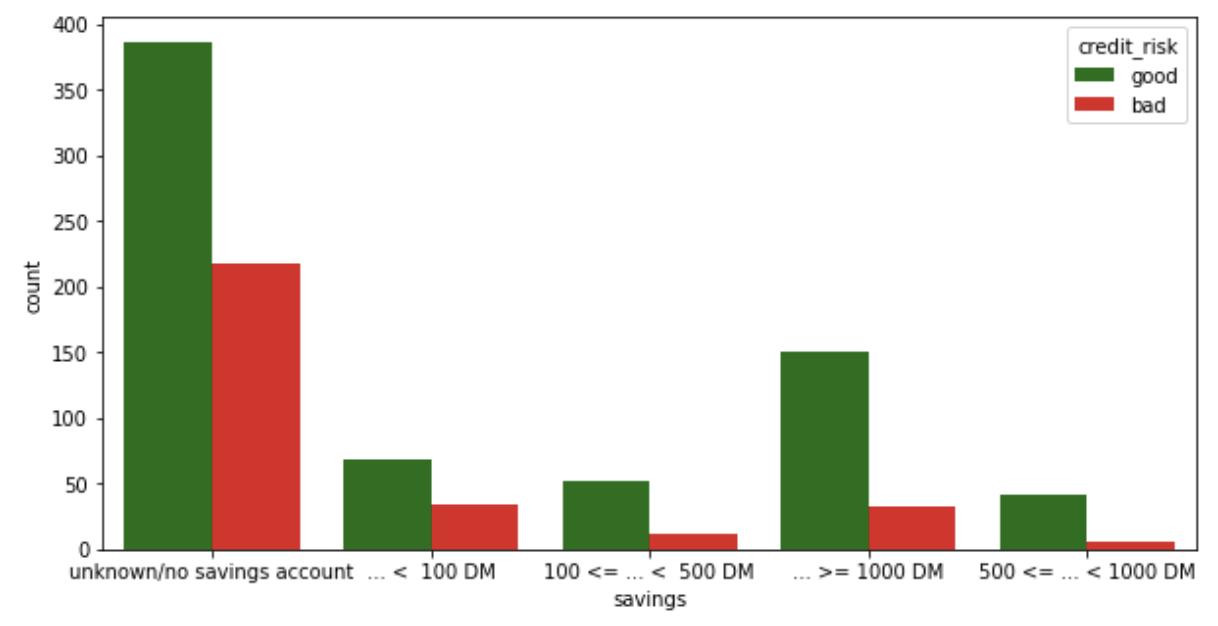

In [400]:
Image("imgs/task_7.png", width=400, height=400)

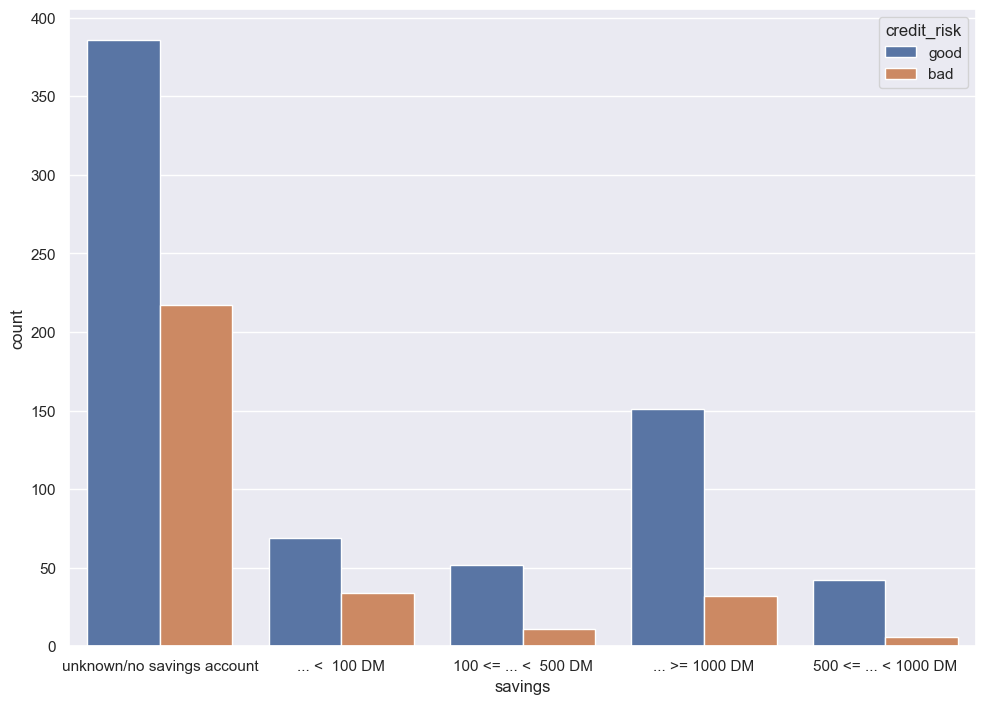

In [401]:
sns.countplot(x="savings", hue="credit_risk", data=df);

**Задание 8**

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

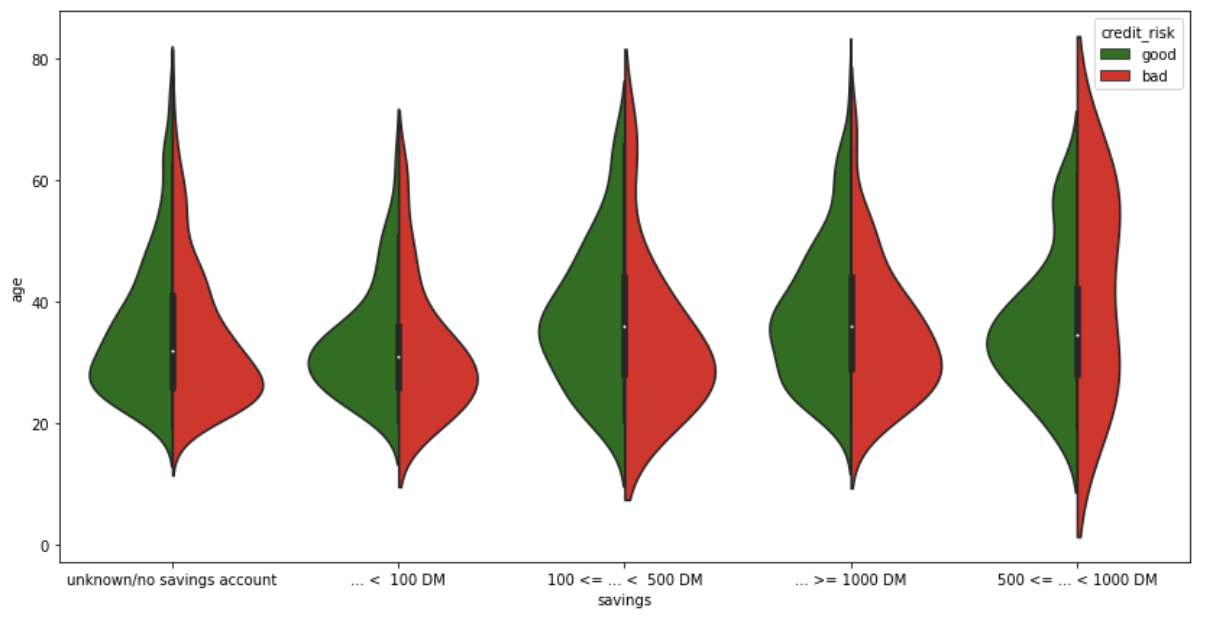

In [402]:
Image("imgs/task_8.png", width=400, height=400)

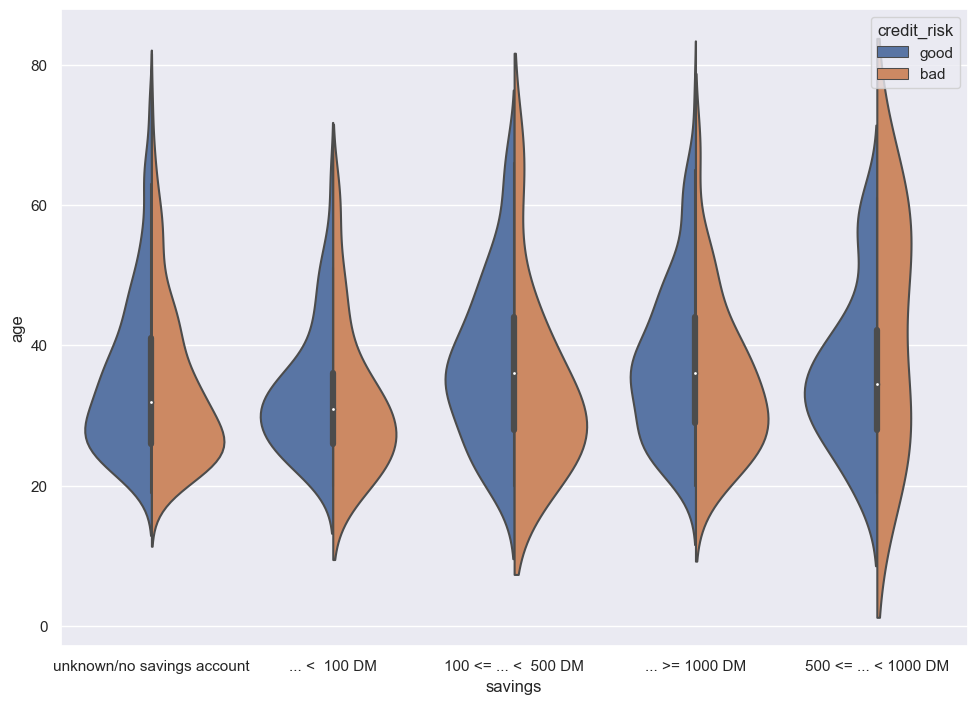

In [403]:
sns.violinplot(data=df, x="savings", y="age", hue="credit_risk", split=True);

**Задание 9**

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

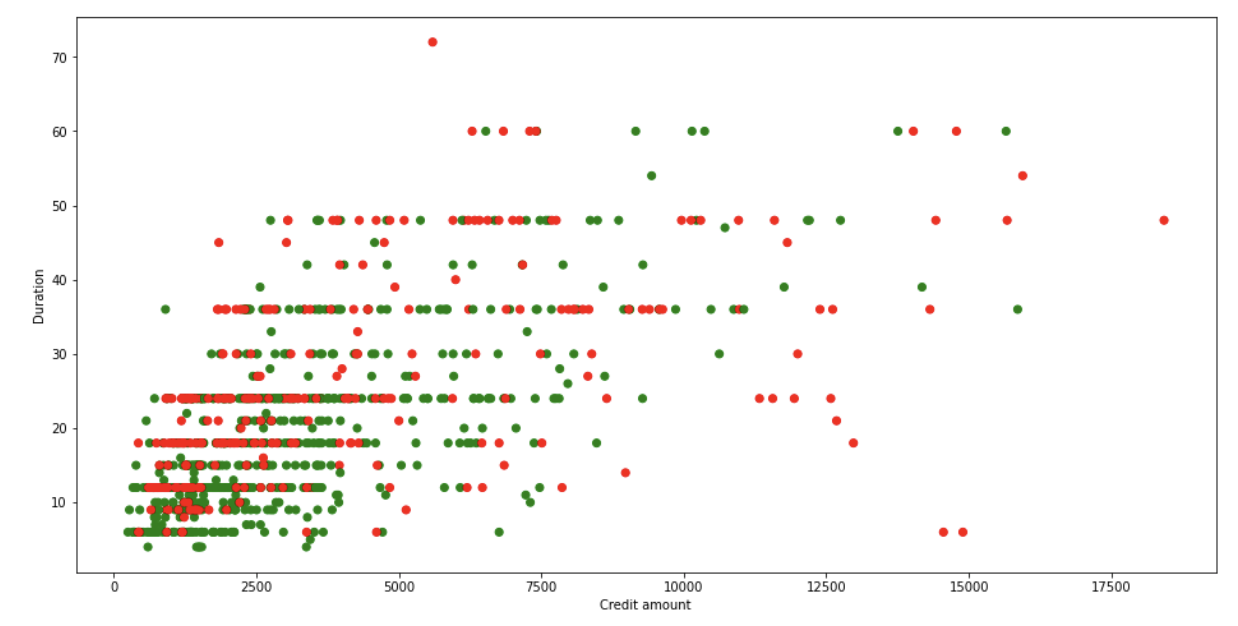

In [404]:
Image("imgs/task_9.png", width=400, height=400)

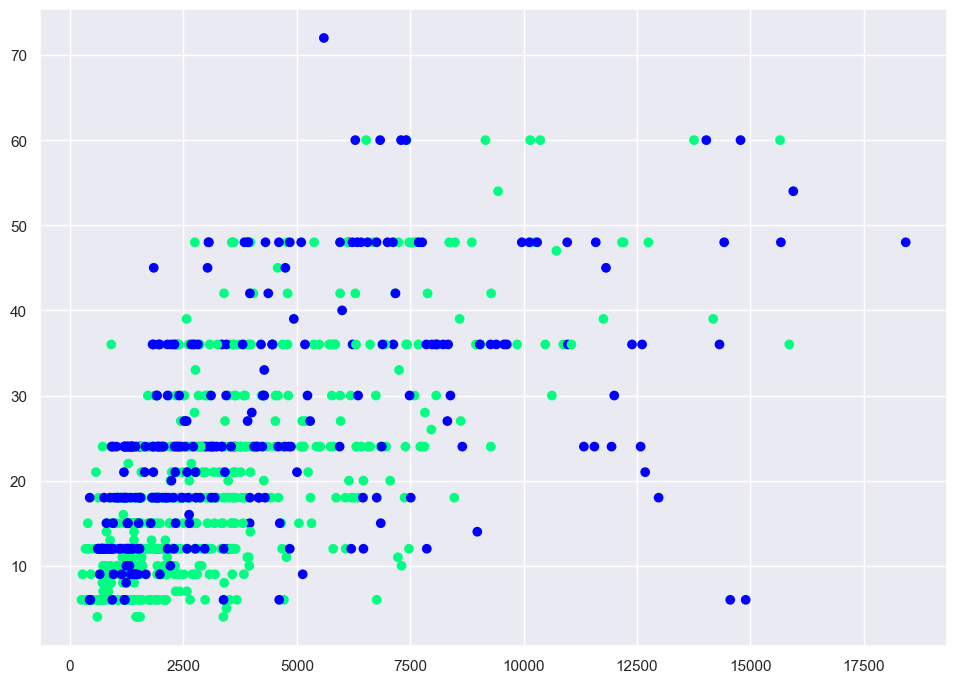

In [405]:
values = df['credit_risk'] == "good"
plt.scatter(df["amount"], df["duration"], c=values, cmap='winter');

**Задание 10**

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

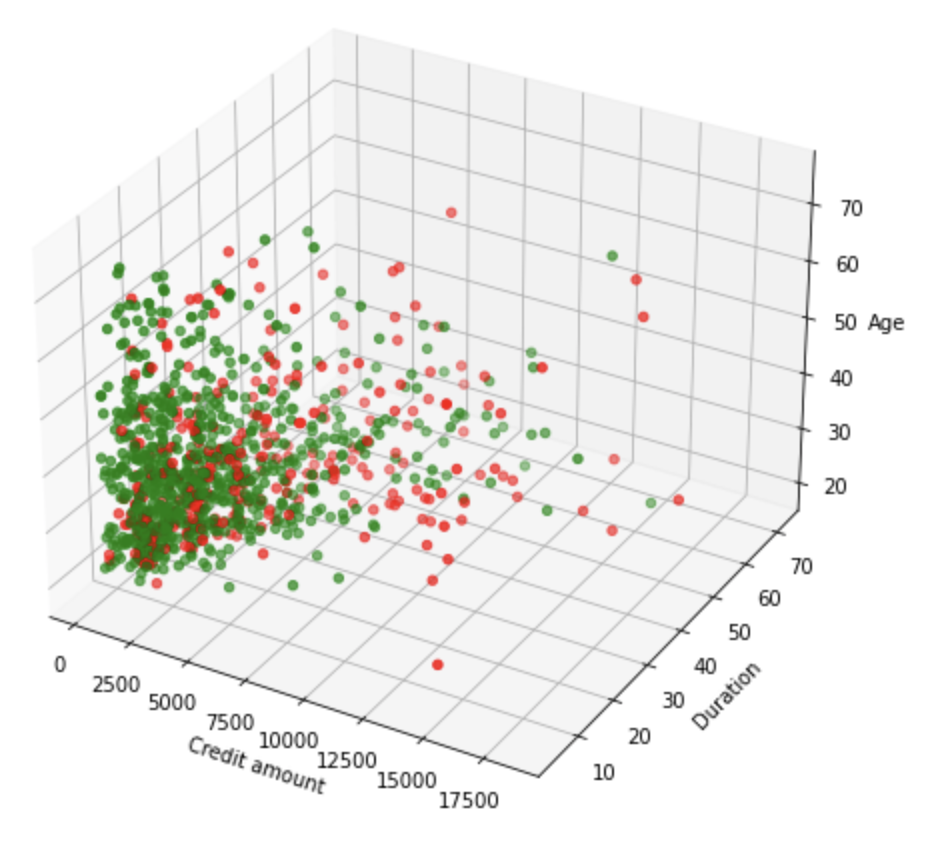

In [406]:
Image("imgs/task_10.png", width=400, height=400)

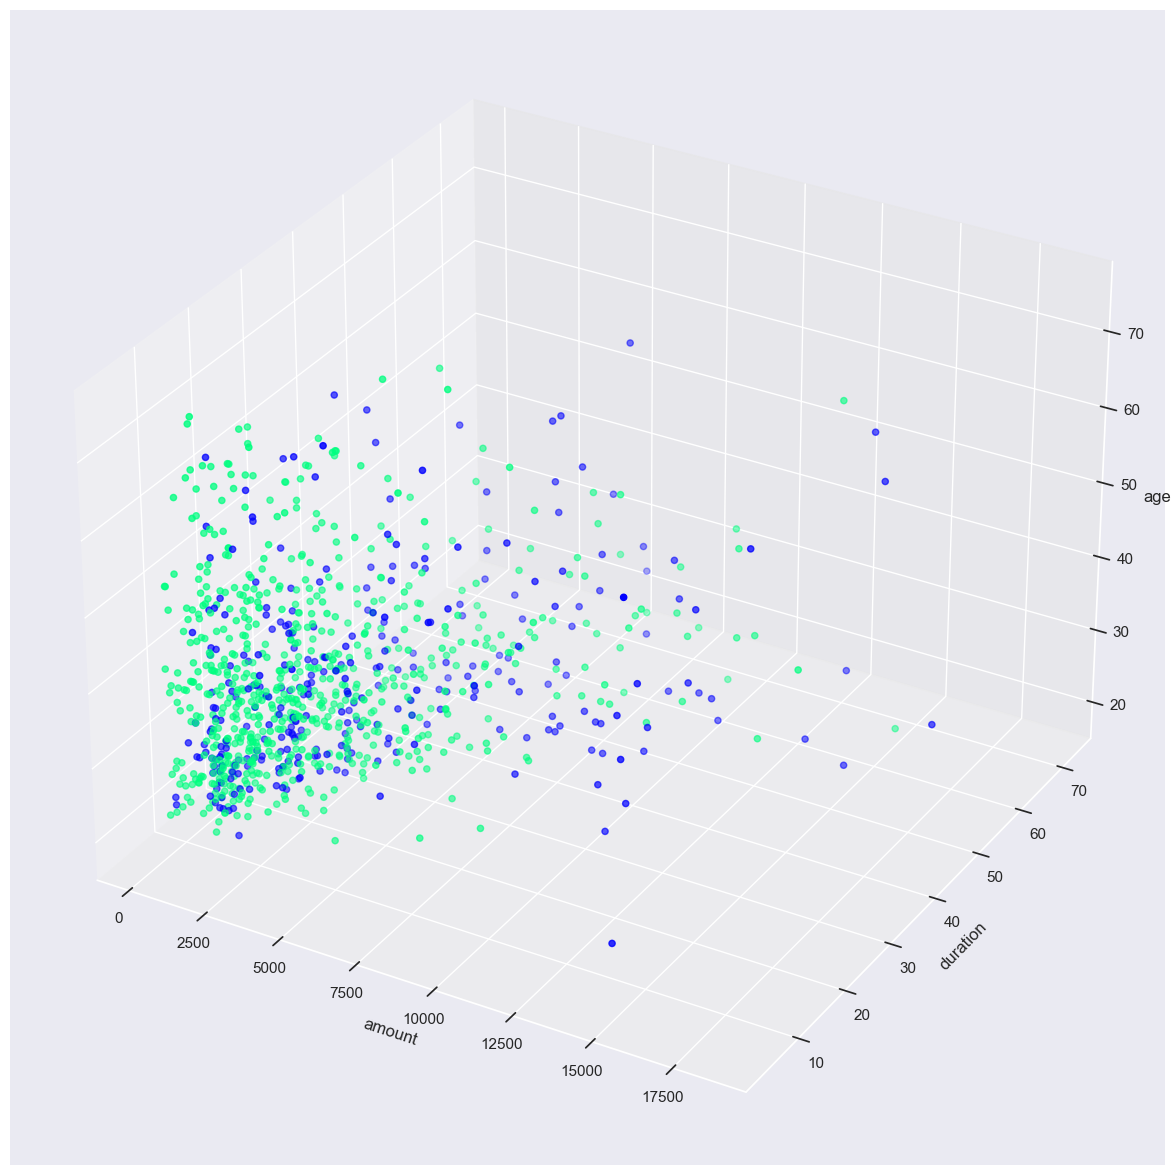

In [407]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

x = df['amount']
y = df['duration']
z = df['age']

ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

values = df['credit_risk'] == "good"
ax.scatter(x, y, z, c=values, cmap='winter')

plt.show()